In [1]:
import pandas as pd
import numpy as np
import cv2
from skimage.io import imread, imshow
import glob
from keras.layers import Conv2D, Dense, Dropout, MaxPool2D, Flatten
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
from keras.metrics import categorical_crossentropy, accuracy
from sklearn.metrics import f1_score, accuracy_score, precision_score, roc_auc_score

Using TensorFlow backend.


In [2]:
WIDTH, HEIGHT = 1320, 968

In [ ]:
train_normal_imgs = list(map(lambda x: cv2.resize(imread(x), (WIDTH, HEIGHT)),
                             glob.glob('../../Downloads/chest-xray-pneumonia/chest_xray/train/NORMAL/*jpeg')))

train_pneumonia_imgs = list(map(lambda x:cv2.resize(imread(x), (WIDTH, HEIGHT)),
                             glob.glob('../../Downloads/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/*jpeg')))

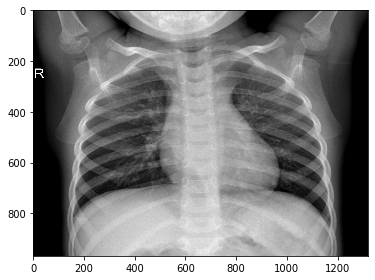

In [4]:
imshow(train_normal_imgs[0]);

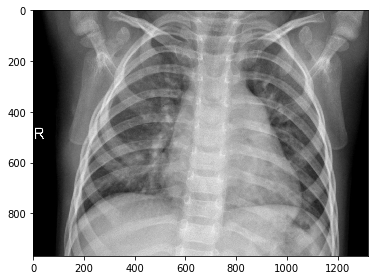

In [5]:
imshow(train_pneumonia_imgs[0]);

In [11]:
normal_labels_train = pd.Series(np.array([0] * len(train_normal_imgs)))
pneumonia_labels_train = pd.Series(np.array([1] * len(train_pneumonia_imgs)))

In [27]:
all_train = train_normal_imgs+train_pneumonia_imgs

MemoryError: Unable to allocate 36.9 GiB for an array with shape (3875, 968, 1320) and data type object

In [12]:
model = Sequential()

In [18]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(WIDTH, HEIGHT, 3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [23]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(x=, 
          y=normal_labels_train.append(pneumonia_labels_train),
         epochs=100, verbose=2, batch_size=256, shuffle=True)

MemoryError: Unable to allocate 36.9 GiB for an array with shape (3875, 968, 1320) and data type object